[ 학습목표 ]

-  Pandas 아파트 실거래를 분석  및 시각화 

 : 상관관계, 선형회귀분석등 

-  머신러닝 ( 사이킷런 ) 

: 회귀분석 , SVM & Grid Search를 사용한 파라미터 최적화 등 

첨부파일
201911Apt

https://www.data.go.kr/data/3035522/fileData.do

In [1]:
# 리눅스에서 한글 설정
import matplotlib
import matplotlib.font_manager

#[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

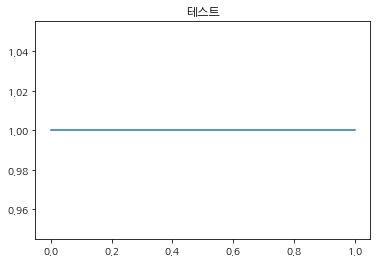

In [3]:
plt.figure()
plt.plot((1,1))
plt.title('테스트')
plt.show()

In [4]:
import pandas as pd
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [5]:
aptData = pd.read_csv('dataset/201911Apt.csv', encoding='euc-kr')
aptData.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [6]:
# 특정 컬럼명 변경하기
aptData = aptData.rename(columns={'분양가격(㎡)':'분양가'})

In [7]:
aptData.tail(10)

,지역명,규모구분,연도,월,분양가
4240,경남,전체,2019,11,3201
4241,경남,전용면적 60㎡이하,2019,11,2780
4242,경남,전용면적 60㎡초과 85㎡이하,2019,11,3174
4243,경남,전용면적 85㎡초과 102㎡이하,2019,11,3247
4244,경남,전용면적 102㎡초과,2019,11,4303
4245,제주,전체,2019,11,3882
4246,제주,전용면적 60㎡이하,2019,11,NaN
4247,제주,전용면적 60㎡초과 85㎡이하,2019,11,3898
4248,제주,전용면적 85㎡초과 102㎡이하,2019,11,NaN
4249,제주,전용면적 102㎡초과,2019,11,3601


In [8]:
aptData.shape

(4250, 5)

In [9]:
aptData.ndim

2

In [10]:
aptData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 5 columns):
지역명     4250 non-null object
규모구분    4250 non-null object
연도      4250 non-null int64
월       4250 non-null int64
분양가     3982 non-null object
dtypes: int64(2), object(3)
memory usage: 166.1+ KB


In [11]:
# 특정 컬럼의 문자열을 정수형으로 변경하기
aptData['분양가'] = aptData['분양가'].convert_objects(convert_numeric=True)
aptData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 5 columns):
지역명     4250 non-null object
규모구분    4250 non-null object
연도      4250 non-null int64
월       4250 non-null int64
분양가     3881 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 166.1+ KB


In [12]:
aptData.isnull().sum()

지역명       0
규모구분      0
연도        0
월         0
분양가     369
dtype: int64

In [17]:
aptData['분양가'].max()

12728.0

In [14]:
aptData['분양가'].min()

1868.0

In [16]:
aptData['분양가'].value_counts().mean()

2.3421846710923355

In [20]:
valna = aptData['분양가'].max() / aptData['분양가'].value_counts().mean()
valna

5434.242720948209

In [25]:
# fillna() 사용해서 NaN 데이터를 수정하거나 변경
# 분양가 -> 지역특성, 위치 등을 고려
aptData['분양가'] = aptData['분양가'].fillna(valna)

In [26]:
aptData.isnull().sum()

지역명     0
규모구분    0
연도      0
월       0
분양가     0
dtype: int64

In [27]:
import missingno as msno

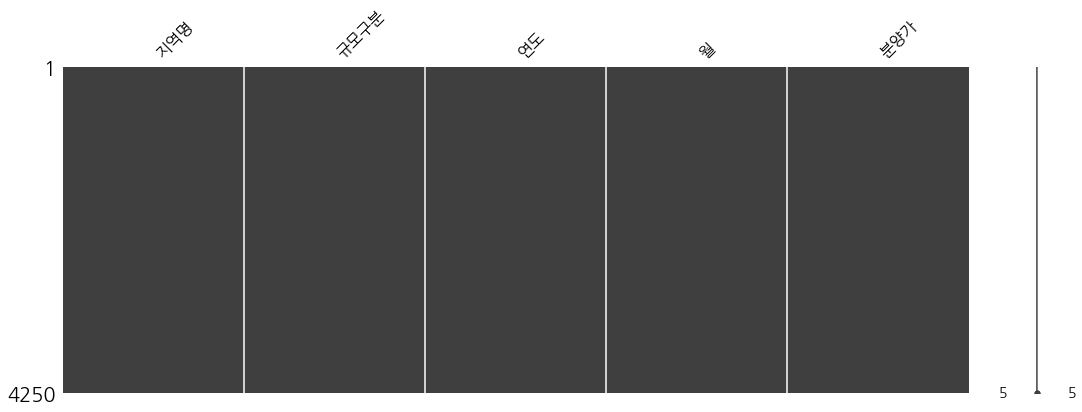

In [28]:
msno.matrix(aptData, figsize=(18,6))

In [29]:
# 지역명, 규모구분을 출력하되 인덱스가 10~30까지 데이터를 출력하시오
# loc[:, 칼럼명]
aptData.loc[10:30,['지역명','규모구분']]

,지역명,규모구분
10,경기,전체
11,경기,전용면적 60㎡이하
12,경기,전용면적 60㎡초과 85㎡이하
13,경기,전용면적 85㎡초과 102㎡이하
14,경기,전용면적 102㎡초과
15,부산,전체
16,부산,전용면적 60㎡이하
17,부산,전용면적 60㎡초과 85㎡이하
18,부산,전용면적 85㎡초과 102㎡이하
19,부산,전용면적 102㎡초과


In [30]:
# aptData 에서 지역명이 경기, 광주, 대구만 출력
# 경기 250
print('경기 : {}'.format(len(aptData[aptData.지역명 == '경기'])))

경기 : 250


In [31]:
# 광주 250
print('광주 : {}'.format(len(aptData[aptData.지역명 == '광주'])))

광주 : 250


In [32]:
# 지역명이 경기에서 2019년에 해당하는 데이터를 출력 하려고 한다
#aptData[(aptData.지역명 == '광주') & (aptData.연도 > 2018)] # 얘도 같은 결과
aptData[(aptData['지역명'] == '경기') & (aptData.연도 > 2018)]

,지역명,규모구분,연도,월,분양가
3325,경기,전체,2019,1,4258.0
3326,경기,전용면적 60㎡이하,2019,1,4440.0
3327,경기,전용면적 60㎡초과 85㎡이하,2019,1,4216.0
3328,경기,전용면적 85㎡초과 102㎡이하,2019,1,4905.0
3329,경기,전용면적 102㎡초과,2019,1,4931.0
3410,경기,전체,2019,2,4256.0
3411,경기,전용면적 60㎡이하,2019,2,4444.0
3412,경기,전용면적 60㎡초과 85㎡이하,2019,2,4216.0
3413,경기,전용면적 85㎡초과 102㎡이하,2019,2,5018.0
3414,경기,전용면적 102㎡초과,2019,2,4945.0


In [33]:
def make_dfall():

    df_all = pd.DataFrame({'sno': ['A001', 'B001', 'A002', 'B002','A003','B003'],\
    'student': ['홍길동', '이순자', '왕서방', '영심이','호철이','가진이'],
    'kor': [85,95,85,80,90,75],
    'eng': [90,95,95,80,65,100],
    'math': [85,75,75,100,70,80]
    })

    return df_all

In [34]:
aa = make_dfall()
aa

,sno,student,kor,eng,math
0,A001,홍길동,85,90,85
1,B001,이순자,95,95,75
2,A002,왕서방,85,95,75
3,B002,영심이,80,80,100
4,A003,호철이,90,65,70
5,B003,가진이,75,100,80


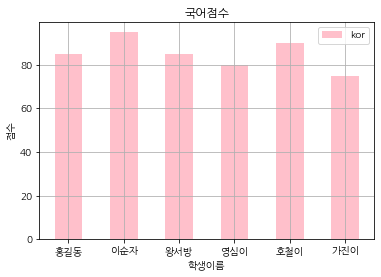

In [35]:
plt.bar(aa['student'],aa['kor'],color='pink',width=0.5,label='kor') # bar(x,y)
plt.legend(loc=1)
plt.title('국어점수')
plt.xlabel('학생이름')
plt.ylabel('점수')
plt.grid()
plt.show()

### 연습문제
국어/영어/수학 점수를 시각화 하시오

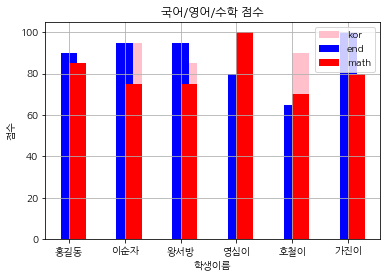

In [36]:
plt.bar(aa['student'], aa['kor'], color='pink', align='edge', width=0.3, label='kor')
plt.bar(aa['student'], aa['eng'], color='blue', width=0.3, label='end')
plt.bar(aa['student'], aa['math'], color='red', align='edge', width=0.3, label='math')
plt.legend()
plt.title('국어/영어/수학 점수')
plt.xlabel('학생이름')
plt.ylabel('점수')
plt.grid()
plt.show()

In [37]:
df = pd.DataFrame({
    '상품번호':['상품1','상품1','상품2','상품2'],
    '수량':[2,3,5,10]
})
df

,상품번호,수량
0,상품1,2
1,상품1,3
2,상품2,5
3,상품2,10


In [38]:
df.min()

상품번호    상품1
수량        2
dtype: object

In [39]:
df.max()

상품번호    상품2
수량       10
dtype: object

In [40]:
df.sum()

상품번호    상품1상품1상품2상품2
수량                20
dtype: object

In [41]:
df.mean()

수량    5.0
dtype: float64

In [42]:
df.count()

상품번호    4
수량      4
dtype: int64

In [43]:
# group by 절
df.groupby(by=['상품번호'])

In [44]:
# 상품 번호별 판매 수
df.groupby(by=['상품번호'], as_index=False).count()

,상품번호,수량
0,상품1,2
1,상품2,2


In [45]:
# 상품 번호별 총 수량
df.groupby(by=['상품번호'], as_index=False).sum()

,상품번호,수량
0,상품1,5
1,상품2,15


In [46]:
# 상품 번호별 판매된 평균 수량
df.groupby(by=['상품번호'], as_index=False).mean()

,상품번호,수량
0,상품1,2.5
1,상품2,7.5


In [47]:
import pandas as pd
df = pd.DataFrame({'고객번호' : ['고객1','고객2','고객2','고객2'],
                   '상품번호' : ['상품1','상품1','상품2','상품2'],
                   '수량' : [2,3,5,10]})

In [48]:
df

,고객번호,상품번호,수량
0,고객1,상품1,2
1,고객2,상품1,3
2,고객2,상품2,5
3,고객2,상품2,10


In [49]:
# sum: 고객별 발송해야 할 상품별 수량 합계
df.groupby(by=['고객번호', '상품번호'], as_index=False).sum()

,고객번호,상품번호,수량
0,고객1,상품1,2
1,고객2,상품1,3
2,고객2,상품2,15


In [50]:
# ------------------------------- 연습 끝

In [51]:
aptGroupby = aptData.loc[aptData.지역명 == '경기'].groupby(['연도'])

In [52]:
aptGroupby = aptGroupby.count()
aptGroupby

,지역명,규모구분,월,분양가
연도,,,,
2015,15,15,15,15
2016,60,60,60,60
2017,60,60,60,60
2018,60,60,60,60
2019,55,55,55,55


In [53]:
aptGroupby.index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='연도')

In [56]:
# 경기지역을 연도별 지역 갯수를 시각화 하시오. bar

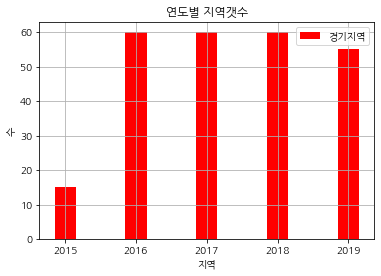

In [74]:
plt.bar(aptGroupby.index,aptGroupby['지역명'],color='red',width=0.3,  label='경기지역') 
# bar (x , y ) == 엑스와이 좌표
plt.legend() 
plt.title('연도별 지역갯수')
plt.xlabel('지역')
plt.ylabel('수')
plt.grid()
plt.show()

In [59]:
# json 파일로 읽기
df3 = make_dfall()
df3

,sno,student,kor,eng,math
0,A001,홍길동,85,90,85
1,B001,이순자,95,95,75
2,A002,왕서방,85,95,75
3,B002,영심이,80,80,100
4,A003,호철이,90,65,70
5,B003,가진이,75,100,80


In [61]:
# DataFrame 을 json 으로 저장하기
df3.to_json('mytest.json', force_ascii=False)

In [62]:
dfjson = pd.read_json('mytest.json')

In [63]:
dfjson

,sno,student,kor,eng,math
0,A001,홍길동,85,90,85
1,B001,이순자,95,95,75
2,A002,왕서방,85,95,75
3,B002,영심이,80,80,100
4,A003,호철이,90,65,70
5,B003,가진이,75,100,80


In [64]:
df3.to_json('mytest2.json', force_ascii=False, orient='records')

In [68]:
# 주로 일반적으로 사용하는 방법
df3.to_json(orient='records', force_ascii=False)

'[{"sno":"A001","student":"홍길동","kor":85,"eng":90,"math":85},{"sno":"B001","student":"이순자","kor":95,"eng":95,"math":75},{"sno":"A002","student":"왕서방","kor":85,"eng":95,"math":75},{"sno":"B002","student":"영심이","kor":80,"eng":80,"math":100},{"sno":"A003","student":"호철이","kor":90,"eng":65,"math":70},{"sno":"B003","student":"가진이","kor":75,"eng":100,"math":80}]'

In [69]:
df3.to_json(orient='split', force_ascii=False)

'{"columns":["sno","student","kor","eng","math"],"index":[0,1,2,3,4,5],"data":[["A001","홍길동",85,90,85],["B001","이순자",95,95,75],["A002","왕서방",85,95,75],["B002","영심이",80,80,100],["A003","호철이",90,65,70],["B003","가진이",75,100,80]]}'

In [70]:
df3.to_json(orient='table', force_ascii=False)

'{"schema": {"fields":[{"name":"index","type":"integer"},{"name":"sno","type":"string"},{"name":"student","type":"string"},{"name":"kor","type":"integer"},{"name":"eng","type":"integer"},{"name":"math","type":"integer"}],"primaryKey":["index"],"pandas_version":"0.20.0"}, "data": [{"index":0,"sno":"A001","student":"홍길동","kor":85,"eng":90,"math":85},{"index":1,"sno":"B001","student":"이순자","kor":95,"eng":95,"math":75},{"index":2,"sno":"A002","student":"왕서방","kor":85,"eng":95,"math":75},{"index":3,"sno":"B002","student":"영심이","kor":80,"eng":80,"math":100},{"index":4,"sno":"A003","student":"호철이","kor":90,"eng":65,"math":70},{"index":5,"sno":"B003","student":"가진이","kor":75,"eng":100,"math":80}]}'

In [71]:
# 인덱스를 부여하는 방법
df3.to_json(orient='index', force_ascii=False)

'{"0":{"sno":"A001","student":"홍길동","kor":85,"eng":90,"math":85},"1":{"sno":"B001","student":"이순자","kor":95,"eng":95,"math":75},"2":{"sno":"A002","student":"왕서방","kor":85,"eng":95,"math":75},"3":{"sno":"B002","student":"영심이","kor":80,"eng":80,"math":100},"4":{"sno":"A003","student":"호철이","kor":90,"eng":65,"math":70},"5":{"sno":"B003","student":"가진이","kor":75,"eng":100,"math":80}}'

In [72]:
# 칼럼
df3.to_json(orient='columns', force_ascii=False)

'{"sno":{"0":"A001","1":"B001","2":"A002","3":"B002","4":"A003","5":"B003"},"student":{"0":"홍길동","1":"이순자","2":"왕서방","3":"영심이","4":"호철이","5":"가진이"},"kor":{"0":85,"1":95,"2":85,"3":80,"4":90,"5":75},"eng":{"0":90,"1":95,"2":95,"3":80,"4":65,"5":100},"math":{"0":85,"1":75,"2":75,"3":100,"4":70,"5":80}}'

In [73]:
#
df3.to_json(orient='values', force_ascii=False)

'[["A001","홍길동",85,90,85],["B001","이순자",95,95,75],["A002","왕서방",85,95,75],["B002","영심이",80,80,100],["A003","호철이",90,65,70],["B003","가진이",75,100,80]]'